# Imports

In [33]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [34]:
CTCF_WT = pd.read_csv(r"C:\GIT\mitotic-exit-code\Data\03_MExit_protein_depletions\dNup153\dNup153_R1\CTCF_WT.csv", sep = ',')
CTCF_dNup153 = pd.read_csv(r"C:\GIT\mitotic-exit-code\Data\03_MExit_protein_depletions\dNup153\dNup153_R1\CTCF_dNup153.csv", sep = ',')
RAD21_WT = pd.read_csv(r"C:\GIT\mitotic-exit-code\Data\03_MExit_protein_depletions\dNup153\dNup153_R1\SMC2_RAD21_WT.csv", sep = ',')
RAD21_dNup153 = pd.read_csv(r"C:\GIT\mitotic-exit-code\Data\03_MExit_protein_depletions\dNup153\dNup153_R1\SMC2_RAD21_dNup153.csv", sep = ',')

In [35]:
#1 pixel = 0.02571912 cubic micron, 50000 pixels are 1285 cubic microns
CTCF_WT = CTCF_WT.loc[(CTCF_WT['area']>15000) & (CTCF_WT['area']<80000) & (CTCF_WT['median_intensity_ch0']<10000)] 
CTCF_dNup153 = CTCF_dNup153.loc[(CTCF_dNup153['area']>15000) & (CTCF_dNup153['area']<80000) & (CTCF_dNup153['median_intensity_ch0']<10000)] 
RAD21_WT = RAD21_WT.loc[(RAD21_WT['area']>15000) & (RAD21_WT['area']<80000) & (RAD21_WT['median_intensity_ch0']<10000)]
RAD21_dNup153 = RAD21_dNup153.loc[(RAD21_dNup153['area']>15000) & (RAD21_dNup153['area']<80000) & (RAD21_dNup153['median_intensity_ch0']<10000)] 
CTCF_WT.name = 'CTCF_WT'
CTCF_dNup153.name = 'CTCF_dNup153'
RAD21_dNup153.name = 'RAD21_dNup153'
RAD21_WT.name = 'RAD21_WT'

In [36]:
# background (no cells no debris) was found to be around 400 in 640 channel
CTCF_WT['intensity_mean_ch2'] = CTCF_WT['intensity_mean_ch2'] - 400
CTCF_dNup153['intensity_mean_ch2'] = CTCF_dNup153['intensity_mean_ch2'] - 400
RAD21_dNup153['intensity_mean_ch2'] = RAD21_dNup153['intensity_mean_ch2'] - 400
RAD21_dNup153['intensity_mean_RAD21'] = RAD21_dNup153['intensity_mean_RAD21'] - 400
RAD21_WT['intensity_mean_ch2'] = RAD21_WT['intensity_mean_ch2'] - 400
RAD21_WT['intensity_mean_RAD21'] = RAD21_WT['intensity_mean_RAD21'] - 400
#also for Ch1
CTCF_WT['intensity_mean_ch1'] = CTCF_WT['intensity_mean_ch1'] - 400
CTCF_dNup153['intensity_mean_ch1'] = CTCF_dNup153['intensity_mean_ch1'] - 400
RAD21_WT['intensity_mean_ch1'] = RAD21_WT['intensity_mean_ch1'] - 400
RAD21_dNup153['intensity_mean_ch1'] = RAD21_dNup153['intensity_mean_ch1'] - 400
# calculate volume:
CTCF_WT['volume_uM3'] = CTCF_WT['area'] * 0.2269618 * 0.2269618 * 0.5
CTCF_dNup153['volume_uM3'] = CTCF_dNup153['area'] * 0.2269618 * 0.2269618 * 0.5
RAD21_dNup153['volume_uM3'] = RAD21_dNup153['area'] * 0.2269618 * 0.2269618 * 0.5
RAD21_WT['volume_uM3'] = RAD21_WT['area'] * 0.2269618 * 0.2269618 * 0.5

In [37]:
CTCF_WT['intensity_integrated_ch2'] = CTCF_WT['intensity_mean_ch2'] * CTCF_WT['volume_uM3'] 
CTCF_dNup153['intensity_integrated_ch2'] = CTCF_dNup153['intensity_mean_ch2'] * CTCF_dNup153['volume_uM3']
RAD21_WT['intensity_integrated_ch2'] = RAD21_WT['intensity_mean_ch2'] * RAD21_WT['volume_uM3'] 
RAD21_WT['intensity_integrated_RAD21'] = RAD21_WT['intensity_mean_RAD21'] * RAD21_WT['volume_uM3'] 
RAD21_dNup153['intensity_integrated_RAD21'] = RAD21_dNup153['intensity_mean_RAD21'] * RAD21_dNup153['volume_uM3']
RAD21_dNup153['intensity_integrated_ch2'] = RAD21_dNup153['intensity_mean_ch2'] * RAD21_dNup153['volume_uM3'] 

In [38]:
def classes(df):
    df_inter = df.loc[df['class'] == 1]
    df_mitosis = df.loc[df['class'] == 2]
    return df_inter, df_mitosis

def scatter_overview(df, ax, X = 'area', Y = 'intensity_mean_ch0'):
    df_inter, df_mitosis = classes(df)
    # fig, ax = plt.subplots(figsize=(5, 3))
    ax.scatter(x=df_inter[X], y = df_inter[Y], color = 'black', label = 'mitotic exit')
    ax.scatter(x=df_mitosis[X], y = df_mitosis[Y], color = 'red', label = 'mitosis')
    # plt.scatter(x=DP16_ChA_eG1[X], y = DP16_ChA_eG1[Y], color = 'red', alpha = 0.5)
    ax.set_xlabel(X)
    ax.set_ylabel(Y)
    ax.set_title(df.name)
    ax.legend(loc = "upper right")

def scatter(df1, df2, ax, classX = 'inter', X = 'area', Y = 'intensity_mean_ch0'):
    df1_inter, df1_mitosis = classes(df1)
    df2_inter, df2_mitosis = classes(df2)
    # fig, ax = plt.subplots(figsize=(5, 3))
    if Y == 'intensity_mean_ch0':
        color1 = 'black'
        color2 = 'blue'
        title2 = 'DAPI'
    elif Y == 'intensity_mean_ch1':
        color1 = 'grey'
        color2 = 'green'
        title2 = 'depletion'
    elif Y == 'intensity_mean_ch2' or 'intensity_integrated_ch2' :
        color1 = 'grey'
        color2 = 'purple'
        title2 = 'ch2'
    if classX == 'inter':
        ax.scatter(x=df1_inter[X], y = df1_inter[Y], color = color1, label = str(round(np.mean(df1_inter[Y]),1)))
        ax.scatter(x=df2_inter[X], y = df2_inter[Y], color = color2, label = str(round(np.mean(df2_inter[Y]),1)))
        title1 = 'MExit'
    elif classX == 'mitosis':
        ax.scatter(x=df1_mitosis[X], y = df1_mitosis[Y], color = color1, label = str(round(np.mean(df1_mitosis[Y]),1)))
        ax.scatter(x=df2_mitosis[X], y = df2_mitosis[Y], color = color2, label = str(round(np.mean(df2_mitosis[Y]),1)))
        title1= 'mitosis'
    # plt.scatter(x=DP16_ChA_eG1[X], y = DP16_ChA_eG1[Y], color = 'red', alpha = 0.5)
    ax.set_xlabel(X)
    ax.set_ylabel(Y)
    ax.set_title(str(title1) + ' ' + str(title2))
    ax.legend(loc = "upper right")

def overview_all(df1, df2):
    fig, axs = plt.subplots(2,4, figsize = (20,8))
    # plt.subplots_adjust(top=1.2)
    fig.subplots_adjust(hspace=0.3)
    scatter_overview(df1, ax = axs[0,0])
    scatter_overview(df2, ax = axs[1,0])
    scatter(df1, df2, ax = axs[0,1], Y = 'intensity_mean_ch0')
    scatter(df1, df2, ax = axs[0,2], Y = 'intensity_mean_ch1')
    scatter(df1, df2, ax = axs[0,3], Y = 'intensity_mean_ch2')
    scatter(df1, df2, ax = axs[1,1], classX = 'mitosis', Y = 'intensity_mean_ch0')
    scatter(df1, df2, ax = axs[1,2], classX = 'mitosis', Y = 'intensity_mean_ch1')
    scatter(df1, df2, ax = axs[1,3], classX = 'mitosis', Y = 'intensity_mean_ch2')
    
    plt.plot()

In [39]:
def overview_all_integrated(df1, df2):
    fig, axs = plt.subplots(2,4, figsize = (20,8))
    # plt.subplots_adjust(top=1.2)
    fig.subplots_adjust(hspace=0.3)
    scatter_overview(df1, ax = axs[0,0])
    scatter_overview(df2, ax = axs[1,0])
    scatter(df1, df2, ax = axs[0,1], Y = 'intensity_mean_ch0')
    scatter(df1, df2, ax = axs[0,2], Y = 'intensity_mean_ch1')
    scatter(df1, df2, ax = axs[0,3], Y = 'intensity_integrated_ch2')
    scatter(df1, df2, ax = axs[1,1], classX = 'mitosis', Y = 'intensity_mean_ch0')
    scatter(df1, df2, ax = axs[1,2], classX = 'mitosis', Y = 'intensity_mean_ch1')
    scatter(df1, df2, ax = axs[1,3], classX = 'mitosis', Y = 'intensity_integrated_ch2')
    
    plt.plot()

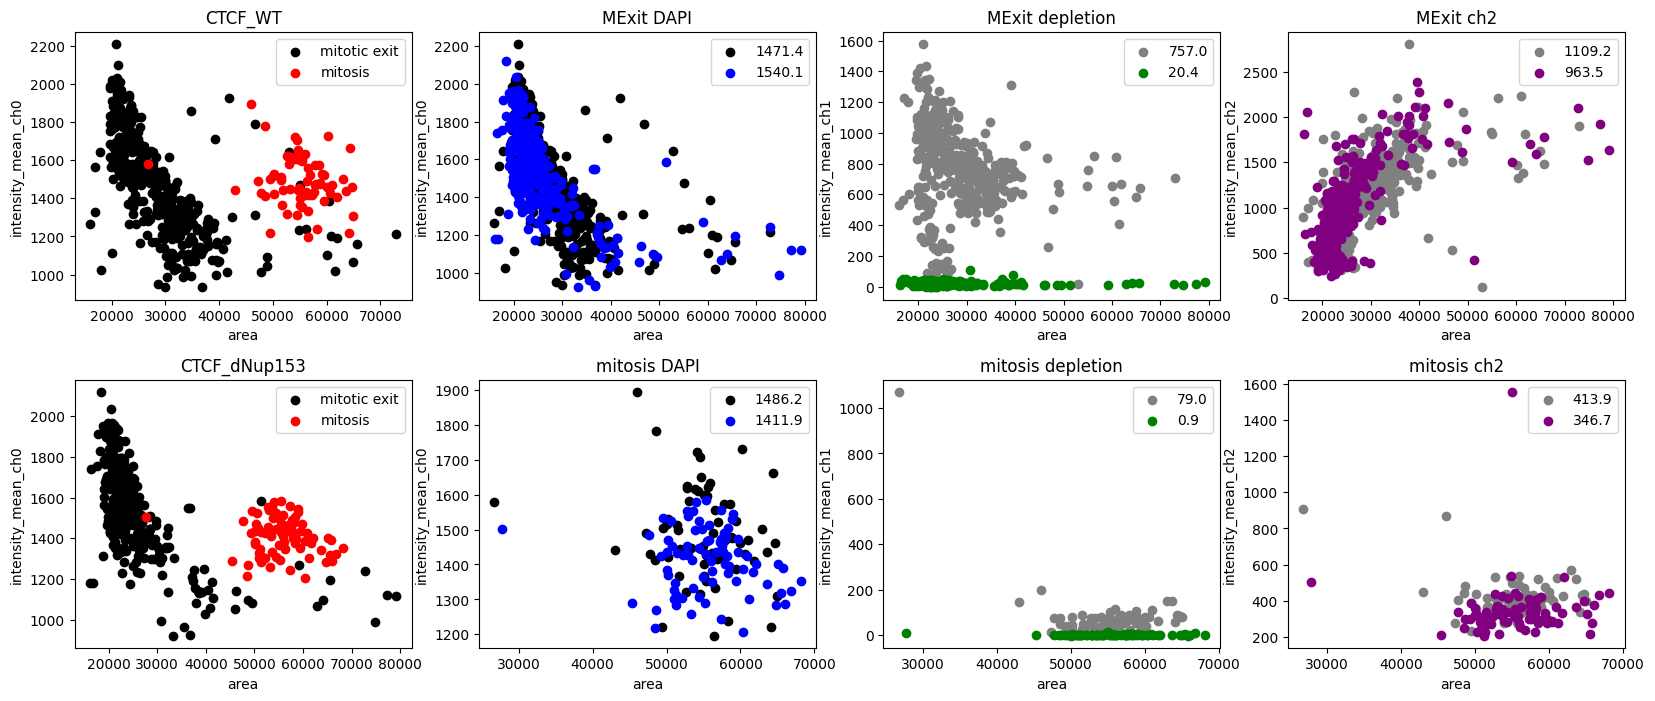

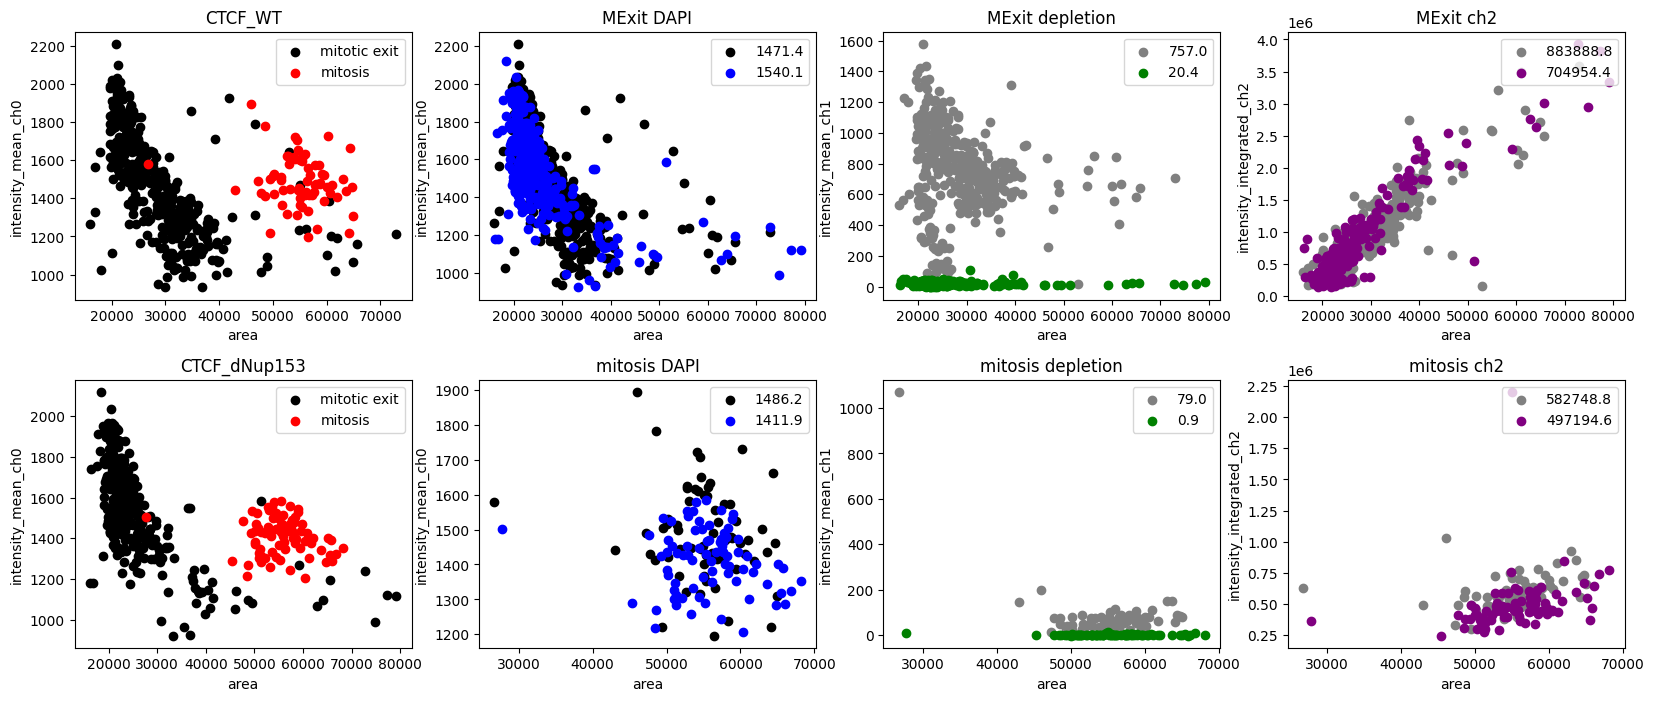

In [40]:
overview_all(CTCF_WT, CTCF_dNup153)
overview_all_integrated(CTCF_WT, CTCF_dNup153)

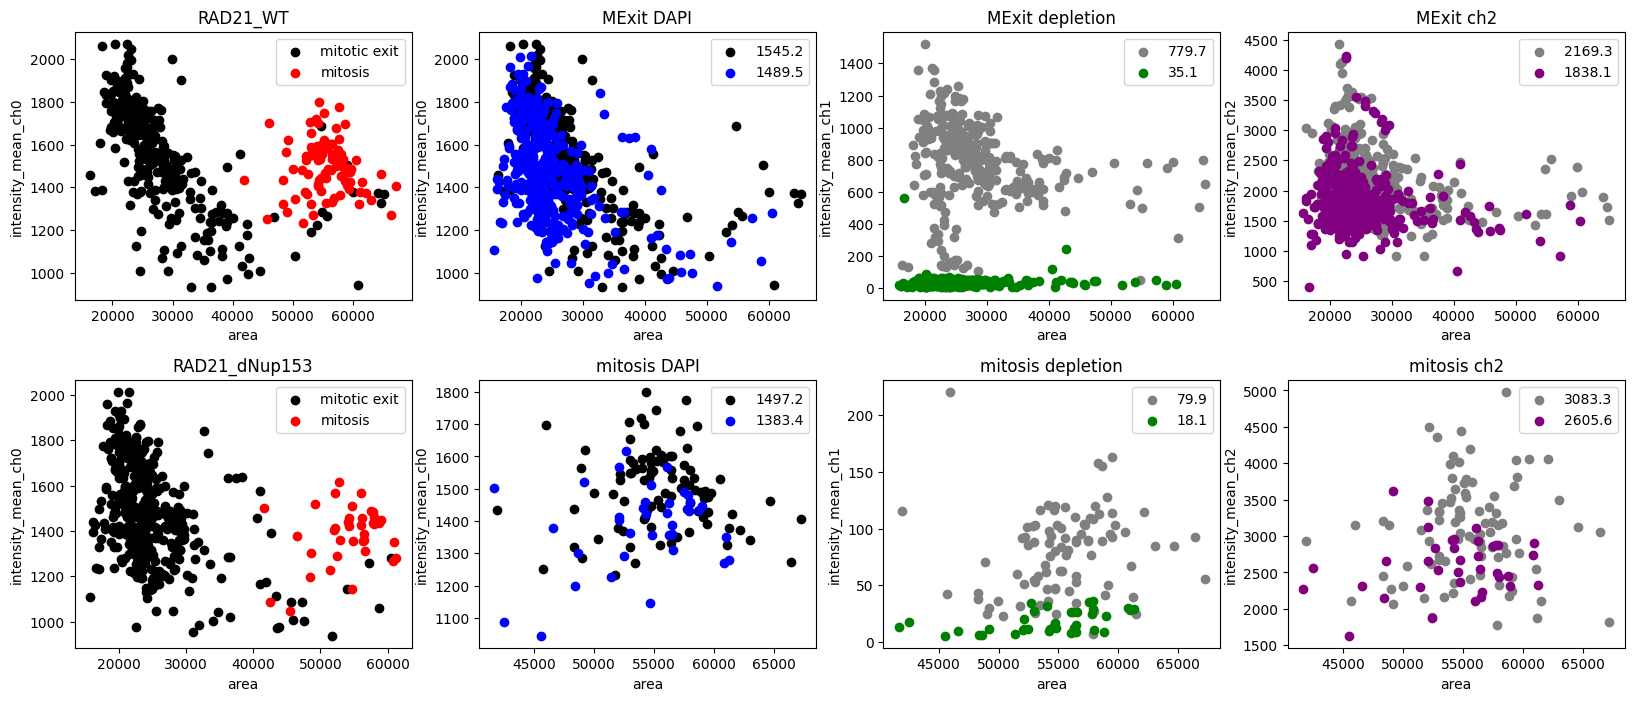

In [41]:
overview_all(RAD21_WT, RAD21_dNup153)


## Integrated intensity plot for RAD21 channel

In [42]:
def scatter_CF(df1, df2, ax, classX = 'inter', X = 'area', Y = 'intensity_mean_ch0'):
    df1_inter, df1_mitosis = classes(df1)
    df2_inter, df2_mitosis = classes(df2)
    # fig, ax = plt.subplots(figsize=(5, 3))
    if Y == 'intensity_mean_ch0':
        color1 = 'black'
        color2 = 'blue'
        title2 = 'DAPI'
    elif Y == 'intensity_mean_ch1':
        color1 = 'grey'
        color2 = 'green'
        title2 = 'depletion'
    elif Y == 'intensity_mean_RAD21' or 'intensity_integrated_RAD21':
        color1 = 'grey'
        color2 = 'purple'
        title2 = 'RAD21'
    if classX == 'inter':
        ax.scatter(x=df1_inter[X], y = df1_inter[Y], color = color1, label = str(round(np.mean(df1_inter[Y]),1)))
        ax.scatter(x=df2_inter[X], y = df2_inter[Y], color = color2, label = str(round(np.mean(df2_inter[Y]),1)))
        title1 = 'MExit'
    elif classX == 'mitosis':
        ax.scatter(x=df1_mitosis[X], y = df1_mitosis[Y], color = color1, label = str(round(np.mean(df1_mitosis[Y]),1)))
        ax.scatter(x=df2_mitosis[X], y = df2_mitosis[Y], color = color2, label = str(round(np.mean(df2_mitosis[Y]),1)))
        title1= 'mitosis'
    # plt.scatter(x=DP16_ChA_eG1[X], y = DP16_ChA_eG1[Y], color = 'red', alpha = 0.5)
    ax.set_xlabel(X)
    ax.set_ylabel(Y)
    ax.set_title(str(title1) + ' ' + str(title2))
    ax.legend(loc = "upper right")

def overview_all_CF(df1, df2):
    fig, axs = plt.subplots(2,4, figsize = (20,8))
    # plt.subplots_adjust(top=1.2)
    fig.subplots_adjust(hspace=0.3, wspace = 0.3)
    scatter_overview(df1, ax = axs[0,0])
    scatter_overview(df2, ax = axs[1,0])
    scatter_CF(df1, df2, ax = axs[0,1], Y = 'intensity_mean_ch0')
    scatter_CF(df1, df2, ax = axs[0,2], Y = 'intensity_mean_ch1')
    scatter_CF(df1, df2, ax = axs[0,3], Y = 'intensity_mean_RAD21')
    scatter_CF(df1, df2, ax = axs[1,1], classX = 'mitosis', Y = 'intensity_mean_ch0')
    scatter_CF(df1, df2, ax = axs[1,2], classX = 'mitosis', Y = 'intensity_mean_ch1')
    scatter_CF(df1, df2, ax = axs[1,3], classX = 'mitosis', Y = 'intensity_mean_RAD21')
    plt.plot()

def overview_all_integrated_CF(df1, df2):
    fig, axs = plt.subplots(2,4, figsize = (20,8))
    # plt.subplots_adjust(top=1.2)
    fig.subplots_adjust(hspace=0.3, wspace = 0.3)
    scatter_overview(df1, ax = axs[0,0])
    scatter_overview(df2, ax = axs[1,0])
    scatter_CF(df1, df2, ax = axs[0,1], Y = 'intensity_mean_ch0')
    scatter_CF(df1, df2, ax = axs[0,2], Y = 'intensity_mean_ch1')
    scatter_CF(df1, df2, ax = axs[0,3], Y = 'intensity_integrated_RAD21')
    scatter_CF(df1, df2, ax = axs[1,1], classX = 'mitosis', Y = 'intensity_mean_ch0')
    scatter_CF(df1, df2, ax = axs[1,2], classX = 'mitosis', Y = 'intensity_mean_ch1')
    scatter_CF(df1, df2, ax = axs[1,3], classX = 'mitosis', Y = 'intensity_integrated_RAD21')
    plt.plot()

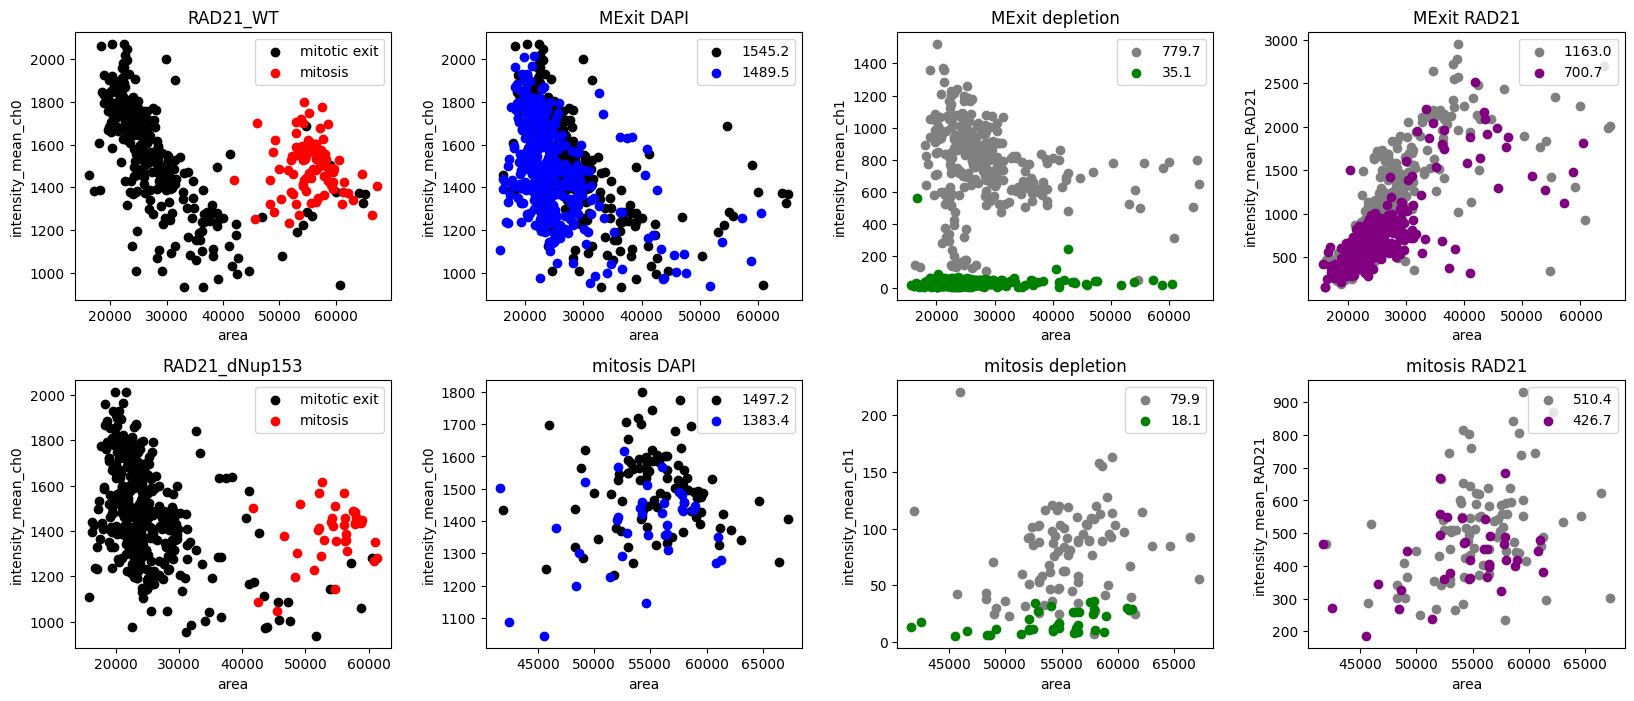

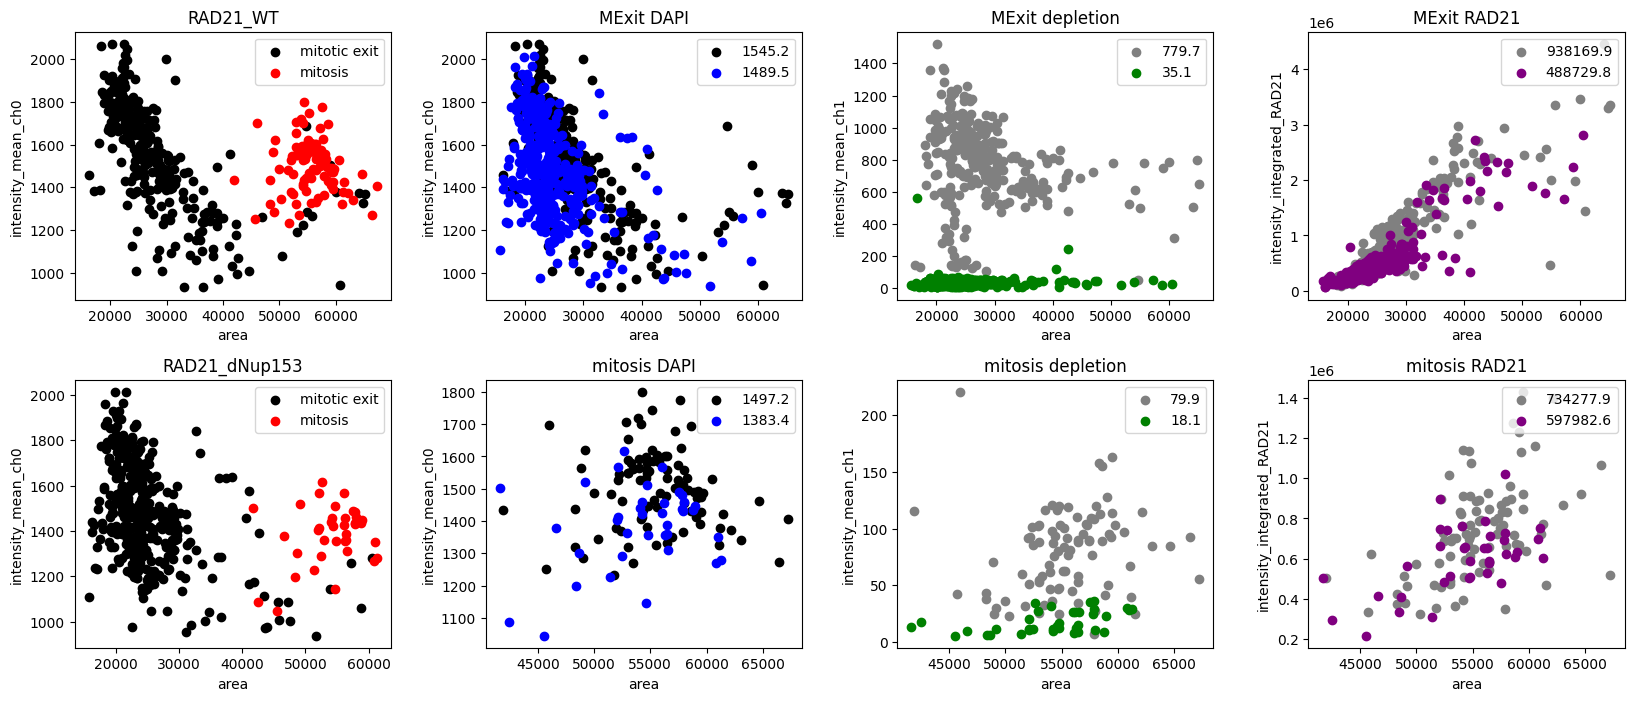

In [43]:
overview_all_CF(RAD21_WT, RAD21_dNup153)
overview_all_integrated_CF(RAD21_WT, RAD21_dNup153)

# Figure

In [44]:
# Specify_colors 
SMC4_color = '#4169E1' #'royalblue'
NCAPH_color = '#1E90FF' # 'dodgerblue'
NCAPH2_color = '#6495ED' # 'cornflowerblue'
CTCF_color = '#FF1493' #'deeppink'
RAD21_color = '#008000' # 'green'
STAG1_color = '#32CD32' # 'limegreen'
STAG2_color = '#228B22' # 'forestgreen'
grey_color = '#808080' # 'grey'

## Concatenate data for plotting

In [45]:
CTCF_WT['condition'] = 'WT'
CTCF_dNup153['condition'] = 'dNup153'
concat = pd.concat([CTCF_WT, CTCF_dNup153])

C:\Users\abrunner.EMBL\AppData\Local\Temp\ipykernel_19688\3137885225.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["WT", "ΔNup153"], rotation=60, ha='right', fontsize = 12)


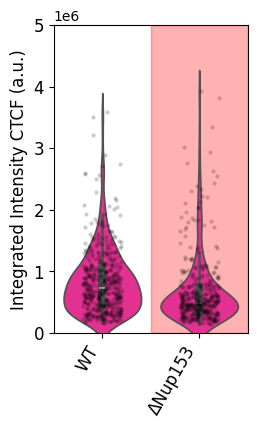

In [46]:
my_pal = {"WT": CTCF_color, "dNup153": CTCF_color}
def violin_plot(df, palette):
    fig, ax = plt.subplots()
    
    plt.axvspan(0.5, 1.5, color='red', alpha=0.3)
    fig.set_figheight(4)
    fig.set_figwidth(2.5)
    sns.violinplot(x=df["condition"], y = df["intensity_integrated_ch2"], hue = df["condition"], palette = palette)
    ax = sns.stripplot(x=df["condition"], y = df["intensity_integrated_ch2"], color = 'black', size = 3, jitter = 0.2, alpha = .2)
    plt.xlabel("")
    ax.set_xticklabels(["WT", "ΔNup153"], rotation=60, ha='right', fontsize = 12)
    # ax.set_ylim(0,0.5)
    plt.ylabel("Integrated Intensity CTCF (a.u.)", fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.ylim(0,5000000)
    # plt.savefig(r"M:\Andi\MExit_manuscript_figures\Plots\depletions\dNup153_CTCF_45min_violinplot.pdf", dpi=500, format="pdf", transparent=True)

violin_plot(concat, my_pal)


In [47]:
RAD21_WT['condition'] = 'WT'
RAD21_dNup153['condition'] = 'dNup153'

concat = pd.concat([RAD21_WT, RAD21_dNup153])


C:\Users\abrunner.EMBL\AppData\Local\Temp\ipykernel_19688\1397475589.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["WT", "ΔNup153"], rotation=60, ha='right', fontsize = 12)


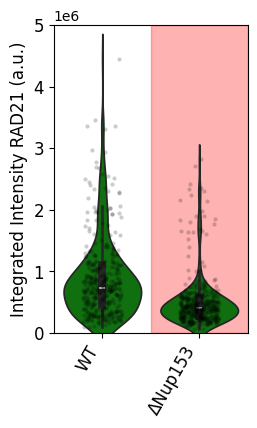

In [48]:
my_pal = {"WT": RAD21_color, "dNup153": RAD21_color}
def violin_plot(df, palette):
    fig, ax = plt.subplots()
    
    plt.axvspan(0.5, 1.5, color='red', alpha=0.3)
    fig.set_figheight(4)
    fig.set_figwidth(2.5)
    sns.violinplot(x=df["condition"], y = df["intensity_integrated_RAD21"], hue = df["condition"], palette = palette)
    ax = sns.stripplot(x=df["condition"], y = df["intensity_integrated_RAD21"], color = 'black', size = 3, jitter = 0.2, alpha = .2)
    plt.xlabel("")
    ax.set_xticklabels(["WT", "ΔNup153"], rotation=60, ha='right', fontsize = 12)
    # ax.set_ylim(0,0.5)
    plt.ylabel("Integrated Intensity RAD21 (a.u.)", fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.ylim(0,5000000)
    # plt.savefig(r"M:\Andi\MExit_manuscript_figures\Plots\depletions\dNup153_RAD21_45min_violinplot.pdf", dpi=500, format="pdf", transparent=True)

violin_plot(concat, my_pal)
